In [2]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [4]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

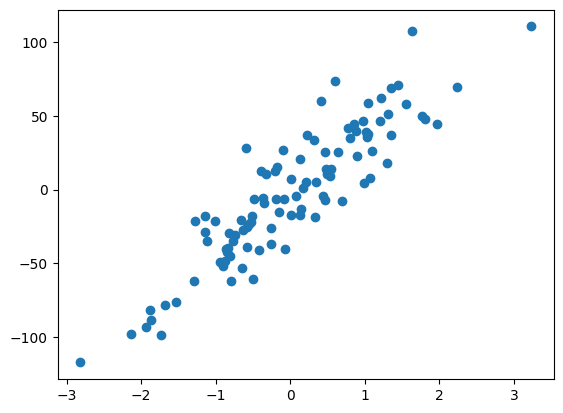

In [5]:
plt.scatter(X,y)

In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [17]:
m = model.coef_
print(m)


[39.05340746]


In [18]:
b = model.intercept_
print(b)

-3.210284357585432


In [109]:
# lets create a class which is used to reach the 'b' value from random value the formula is : y = m*X+b
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 39.05
        self.b = -100
        self.lr = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slope = -2 * np.mean(y-self.m*X.ravel() - self.b)
            self.b = self.b - (self.lr * loss_slope) #this () tells us the abut the stepsize means it called as stepsize
            print(loss_slope,self.b)
        print(self.b)
        

In [110]:
gd = GDRegressor(0.1,25)

In [111]:
gd.fit(X,y)

-193.57959320522843 -80.64204067947716
-154.86367456418273 -65.15567322305888
-123.89093965134617 -52.76657925792426
-99.11275172107695 -42.85530408581657
-79.29020137686156 -34.92628394813041
-63.43216110148924 -28.58306783798149
-50.7457288811914 -23.50849494986235
-40.59658310495311 -19.448836639367038
-32.477266483962495 -16.20110999097079
-25.98181318716999 -13.602928672253789
-20.785450549735998 -11.52438361728019
-16.6283604397888 -9.86154757330131
-13.302688351831039 -8.531278738118207
-10.642150681464827 -7.467063669971724
-8.513720545171864 -6.615691615454537
-6.810976436137492 -5.934593971840788
-5.448781148909993 -5.389715856949788
-4.359024919127995 -4.953813365036988
-3.4872199353023943 -4.605091371506749
-2.7897759482419144 -4.326113776682558
-2.2318207585935337 -4.102931700823205
-1.785456606874828 -3.924386040135722
-1.4283652854998605 -3.781549511585736
-1.14269222839989 -3.667280288745747
-0.9141537827199108 -3.575864910473756
-3.575864910473756


**NOW LETS PREDICT THE VALUE OF REAL{M} AND {B} WITH THE HELP OF RANDOM INIT VALUES**

In [3]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [5]:
X,y = make_regression(n_samples = 100,n_features=1,n_informative=1,n_targets=1,noise=0.1,random_state=12)

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=12)

In [9]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [11]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
m = model.coef_
print(m)

[35.56107984]


In [13]:
b = model.intercept_
print(b)

-0.005722736664405481


In [19]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -50
        self.lr = learning_rate
        self.ep = epochs

    def fit(self,X,y):
        for i in range(self.ep):
            b_slope = -2 * np.mean(y - self.m * X.ravel() - self.b)
            m_slope = -2 * np.mean((y - self.m * X.ravel() - self.b)*X.ravel())
            self.b = self.b - (self.lr * b_slope)
            self.m = self.m - (self.lr * m_slope)
            print(self.m,self.b)

    def predict(self,X):
        return self.m * X + self.b

In [29]:
gd = GDRegressor(0.1,100)

In [30]:
gd.fit(X_train,y_train)

85.71332411848384 -37.95244622146778
74.62475874401343 -28.768617652998714
66.01309372622563 -21.77409213531529
59.32066987603776 -16.45226128282704
54.116135101199546 -12.407567974152867
50.06570795655781 -9.337280433945622
46.91100088292081 -7.009825112613387
44.451902073214946 -5.248158053019626
42.53335901274287 -3.917006218477572
41.035171860237526 -2.9130807443555904
39.86410911678278 -2.1575720370888556
38.947815446412136 -1.5903965189157094
38.23010282825963 -1.165787711545265
37.66730972458177 -0.8489188108873573
37.22548502593255 -0.6133164993407243
36.87820910151873 -0.43888152609350833
36.604907126958125 -0.3103744464303102
36.38954290106665 -0.21625783733213563
36.21960684571045 -0.14781159727175333
36.08533153998789 -0.09845736044091627
35.97908330643042 -0.06324296855330089
35.8948900707798 -0.038449391508758896
35.82807475063701 -0.02129127461827963
35.77497040263917 -0.009689032011636432
35.732698743590745 -0.0020955776527808506
35.69899782109187 0.002635248398565087
3

In [31]:
y_pred = gd.predict(X_test)
r2_score(y_test,y_pred)

0.9999960040436603